Populating the interactive namespace from numpy and matplotlib


/opt/python/sci_36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly', 'uniform']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


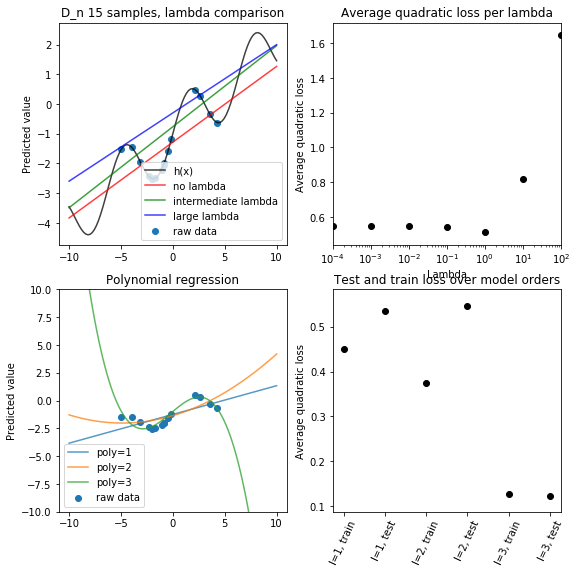

In [35]:
#!/usr/bin/env python
import sys, os
import numpy as np
from random import uniform
import math
get_ipython().run_line_magic('pylab', 'inline')
import matplotlib.pyplot as plt

class regression_gradient:
    def __init__(self, lamb=100, step_size=1, n_steps=100):
        self.lamb = lamb
        self.step_size = step_size
        self.n_steps = n_steps

    def train(self, X, y):
        """Question 1: ridge regression with gradient descent"""

        # if X is a vector, add dummy dimension
        if np.ndim(X) == 1:
            X = np.expand_dims(X, axis=1)

        stopping_tolerance = 1e-15

        self.n = np.shape(X)[0]
        self.d = np.shape(X)[1]
        # includes b at position 0
        self.w = np.random.uniform(low=-0.01, high=0.01, size=self.d + 1) 

        # include column of 1s for b
        X = np.hstack((np.ones((self.n, 1)), X))

        empirical_risk = np.zeros((self.d + 1))
        for i in range(self.n_steps):
            empirical_risk = X.T.dot(X).dot(self.w) - X.T.dot(y)
            regularization = self.lamb * 2 * self.w
            gradient = (empirical_risk + regularization)

            # stopping criteria
            if np.sum(np.abs(gradient)) < stopping_tolerance:
                break

            self.w -= self.step_size  * gradient


    def predict(self, X):
        n = X.shape[0]
        y = np.zeros(n)
        w = self.w[1:]
        b = self.w[0]

        for j in range(n):
            y[j] = w.T.dot(X[j]) + b

        return(y)


def sample_h(n):
    """
    Question 2.
    h(x) = sin(x) + 0.3x -1
    Returns dataset D (x, h(x)) with n points. x in [-5, 5].
    """
    D = np.zeros((n,2))
    for i in range(n):
        D[i,0] = uniform(-5,5)
        D[i,1] = math.sin(D[i,0]) + 0.3*(D[i,0]) - 1
    return D


# plottng options
n_bins = 100
axes_min = -10
axes_max = 10
alpha = 0.75
x = np.atleast_2d(np.linspace(axes_min, axes_max, n_bins)).T

fig, axs = plt.subplots(2, 2, figsize=(9, 9))

# question 3
# plot data
D = sample_h(15)
axs[0][0].scatter(D[:,0], D[:,1]) # raw data

# plot h(x)
y1 = np.zeros(n_bins)
for i in range(n_bins):
    y1[i] = math.sin(x[i]) + 0.3*(x[i]) - 1
axs[0][0].plot(x, y1, color='black', alpha=alpha)

# training settings
step_size = 5e-5
n_steps = 10000

# plot regression_gradient --lambda 0
mdl_1 = regression_gradient(lamb=0, step_size=step_size, n_steps=n_steps)
mdl_1.train(D[:,0], D[:,1])
axs[0][0].plot(x, mdl_1.predict(x), color='red', alpha=alpha)

# question 4
# plot regression_gradient - lambda intermediate
mdl_2 = regression_gradient(lamb=5, step_size=step_size, n_steps=n_steps)
mdl_2.train(D[:,0], D[:,1])
axs[0][0].plot(x, mdl_2.predict(x), color='green', alpha=alpha)

# plot regression_gradient - lambda large
mdl_3 = regression_gradient(lamb=25, step_size=step_size, n_steps=n_steps)
mdl_3.train(D[:,0], D[:,1])
axs[0][0].plot(x, mdl_3.predict(x), color='blue', alpha=alpha)

axs[0][0].legend(['h(x)',
                  'no lambda',
                  'intermediate lambda',
                  'large lambda',
                  'raw data'])

axs[0][0].set_ylabel('Predicted value')
axs[0][0].set_title('D_n 15 samples, lambda comparison')

# question 5
D_test = sample_h(100)
lambs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

avg_loss = np.zeros(len(lambs))
for i, lamb in enumerate(lambs):
    mdl = regression_gradient(lamb=lamb , step_size=step_size, n_steps=n_steps)
    mdl.train(D[:,0], D[:,1])

    b= mdl.w[0]
    w= mdl.w[1:]

    loss = 0
    for j in range(len(D_test)):
        loss += (np.take(((w.T.dot(D_test[j,0]) + b) - D_test[j,1]), 0))**2
    avg_loss[i] = loss/len(D_test)

# bar plot of average quadratic loss per lambda
width = 1.0
axs[0][1].scatter(lambs, avg_loss, c='black' )
axs[0][1].set_ylabel('Average quadratic loss')
axs[0][1].set_xlabel('Lambda')
axs[0][1].set_xscale('log')
axs[0][1].set_xlim([lambs[0], lambs[-1]])
axs[0][1].set_title('Average quadratic loss per lambda')

# question 6
# training settings
step_size = 5e-6
n_steps = 50000

orders = [1, 2, 3]

loss_test = np.zeros((100, len(orders)))
loss_train = np.zeros((15, len(orders)))

for i, l in enumerate(orders):

    # polynomial preprocessing
    poly = np.zeros((np.shape(D)[0], i+1))
    for j in range(np.shape(D)[0]):
        poly[j] = np.array([D[j, 0]**exp for exp in orders[0:i+1]])

    poly_test = np.zeros((np.shape(D_test)[0], i+1))
    for j in range(np.shape(D_test)[0]):
        poly_test[j] = np.array([D_test[j, 0]**exp for exp in orders[0:i+1]])
        
    # ridge regression
    mdl = regression_gradient(lamb=0.01, step_size=step_size, n_steps=n_steps)
    mdl.train(poly, D[:,1])
    b = mdl.w[0]
    w = mdl.w[1:]

    # ploting f learned with ridge regression
    y = np.zeros(n_bins)
    for z in range(n_bins):
        processed_x = np.array([x[z]**exp for exp in orders[:i+1]])
        y[z] = np.dot(w.T, processed_x) + b
    axs[1][0].plot(x, y, alpha=alpha)

    # collect empirical risk, true risk
    train_predictions = mdl.predict(poly)
    test_predictions = mdl.predict(poly_test)
        
    for j in range(len(D_test)):
        loss_test[j, i] = (np.take(((w.T.dot(poly_test[j, :]) + b) - D_test[j,1]), 0))**2

    for j in range(len(D)):
        loss_train[j, i] = (np.take(((w.T.dot(poly[j, :]) + b) - D[j,1]), 0))**2
        
# print models
axs[1][0].scatter(D[:,0], D[:,1])
axs[1][0].legend(['poly=1', 'poly=2', 'poly=3', 'raw data'])
axs[1][0].set_ylabel('Predicted value')
axs[1][0].set_ylim([-10, 10])
axs[1][0].set_title('Polynomial regression')

# print losses
axs[1][1].scatter(np.array([1,2,3,4,5,6]), np.array([
    np.mean(loss_train[:, 0]), np.mean(loss_test[:, 0]),
    np.mean(loss_train[:, 1]), np.mean(loss_test[:, 1]),
    np.mean(loss_train[:, 2]), np.mean(loss_test[:, 2])
]), c='black')


axs[1][1].set_xticklabels(['', 
                           'l=1, train', 'l=1, test', 
                           'l=2, train', 'l=2, test', 
                           'l=3, train', 'l=3, test'])
for tick in axs[1][1].get_xticklabels():
    tick.set_rotation(65)
axs[1][1].set_title('Test and train loss over model orders')
axs[1][1].set_ylabel('Average quadratic loss')

plt.show()

plt.savefig('report.jpg')


As l increases, the empirical risk stays steady for l=1 and l=2, and drops dramatically for l=3, since this particular polynomial fits the function generating the data fairly well. Increasing model order does not help the test performance for l=1 and l=2. Since l=3 is a good model for this particular dataset, the test performance is also good for this model.